<h3 align="center">MLOps on Databricks</h3>

- MLOps is a paradigm that aims to deploy and maintain ML models in production reliably and efficiently.
- MLOps life cycle
1. Introduction to MLOps -> 2. Developing on Databricks -> 3. Getting started with MLflow -> 4. Log and register model in MLflow -> 5. Model serving architectures -> 6. Deploying model serving endpoint -> 7. Databricks Asset Bundles -> 8. CI/CD and deployment strategies -> 9. Intro to monitoring -> 10. Deploy Lakehouse monitor
- Notes is based on https://www.youtube.com/playlist?list=PL_MIDuPM12MOcQQjnLDtWCCCuf1Cv-nWL

#### MLOps Principles
- Traceability & reproducibility of ML deployments
  - For any ML model deployment/run, you should be able to look up unambiguously:
    - Corresponding code/commit on git
    - Infrastructure / environment used for training and serving
    - Data used for model training
    - Generated ML model artifacts
- Code quality
  - Best practices are followed
    - Code review for each PR
    - Automated unit and integration tests
- Monitoring
  - For the ML project
    - Offline evaluation metrices is logged and monitored
    - KPIs and costs are monitored
- Documentation
  - ML project contains documentation of
    - KPIs and business goal
    - Software Architecture design
    - ML Model choice
- A/B testing & experimentation
  - A/B testing is performed regularly
  - It can be guaranteed that the same customer gets the same version of the model during the experiment.
- Feature stores
  - Features are added to the feature store with a PR.
  - The feature store keeps track of the feature usage per model
- Explainability
  - The ML system can explain how it arrived at its decision outputs

##### Databricks Data & AI Platform
- Orchestrator: Lakeflow jobs
- Experiment Tracking: MLFlow
- Compute: Databricks compute
- Glue: DABs
- Serving: Model Serving, Feature Serving
- Model Registry: MLFlow, Unity Catalog
- Feature Engineering: Databricks and Unity Catalog
- Monitoring: Lakehouse Monitoring
- LLM Observability: MLFlow
- Vector Search: Databricks
- Governance: Unity Catalog

#### Each tool covers a principle
- Version control, orchestration tools, CD pipelines -> Reproducibility, Traceability, Code Quality
- Model registry -> Model Traceability & Reproducibility
- Feature stores, data version tools -> Data Traceability & Reproducibility
- Container registry -> Environment Traceability & Reproducibility
- DevOps is a set of practices and tools that aim to:
  - Shorten the systems development lifecycle
  - Break the wall of confusion between developers and IT Operations
- MLOps has same goals but different parties are involved and wall is thicker and taller. MLOps is the extension of DevOps.
  - code, data model, environment and infrastructure: If these properties are the same, a software system is guaranteed to produce the same results. But not an ML system.
  - Statistical properties of the data: If statistical properties of the data have changed, it may (or may not) affect model performance.

#### Lecture 3: Getting started with MLFlow
- ML Flow component
  - Mlflow Tracking: a centralized repository that logs machine learning model parameters, metrics, artifacts, and a reference to data used for model training. Experiment tracking gives insights into changes in models over time, and helps with model evaluation.
  - Model Registry: a centralized model store that allows to manage model's lifecycle, add tags, aliases, and new model versions.
  - MLflow Evaluation: a set of tools to facilitate model evaluation (GenAI and standard ML).
  - MLflow Tracing: enhances LLM observability in your Generative AI (GenAI) applications by capturing detailed information about the execution of your application's services (part of mlflow tracking).
  - Even though all these features are available both in the open-source version of MLflow and Databricks-managed MLflow, there are quite a lot of differences between managed and open- versions.
- Experiment tracking vs registry
  - Experiments and registry have a different backend.
  - Experiments can be found in a workspace (all experiments metadata is stored in a database – abstracted away from the users).
  - Models are registered in Unity Catalog ("the old way" – workspace model registry – is considered legacy).
- MLFlow Experiment
  - Experiments in MLflow are the main unit of organization for ML model training runs.
  - All MLflow runs belong to an experiment. Each MLflow run corresponds to a single execution of model code.
  - All MLflow runs are logged to the active experiment. MLflow Experiment can be created by using mlflow.create_experiment or mlflow.set_experiment commands.
- Refer lecture 3 code in mlflow
  - We have learned how to log Metrics, Parameters and various Artifacts.

#### Lecture 4: Log and register models with MLFlow
- MLFlow Model
  - An MLflow Model is a standard format for packaging machine learning models.
  - MLflow provides "flavors" as wrappers for specific machine learning libraries.
  - Flavors ensure consistent saving, loading, and inference deployment for models from diverse libraries.
  - Custom pyfuncs through the PythonModel base class, which offers flexibility for embedding any library's model into MLflow's structured system.
- Refer lecture 4 code for the details.

#### Lecture 5: Model Serving Architectures
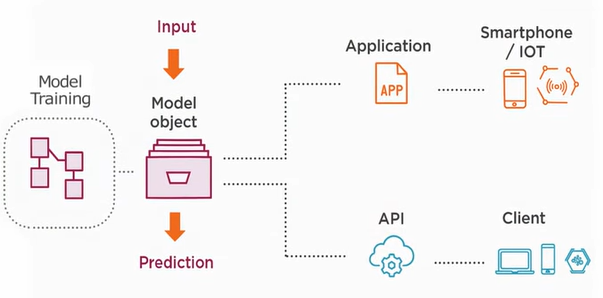

#### Serving: typical ML Architectures

- Batch serving
  - all predictions are precomputed and stored in a database.
  - ML endpoint is reading predictions from the database on request.
  - Typical use case: recommender systems
  - https://xebia.com/blog/ml-serving-architectures/
- Architecture

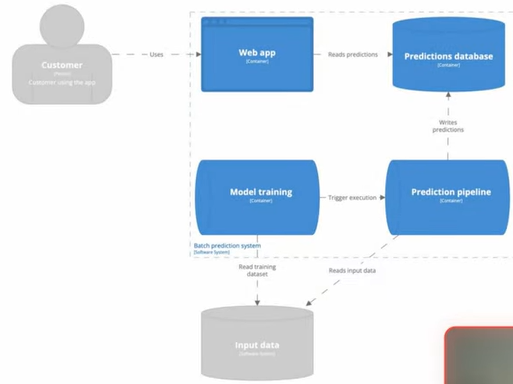


- Real-time model serving
  - ML endpoint is computing predictions at the request.
  - Typical use case: Fraud detection, Recommender systems, Dynamic pricing
- Architecture

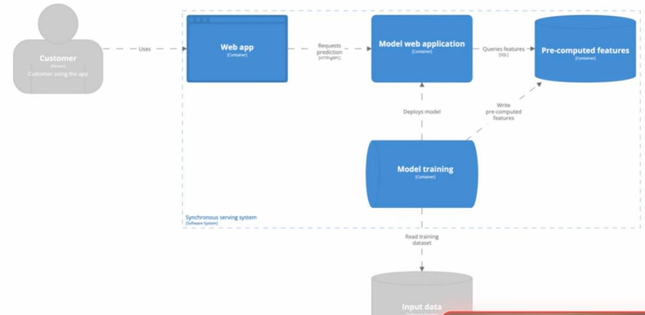

- Model Serving

Scenario 1

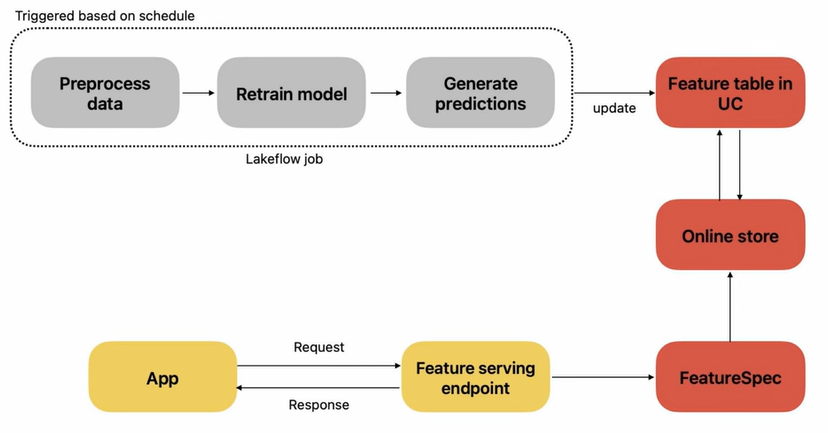

Scenario 2

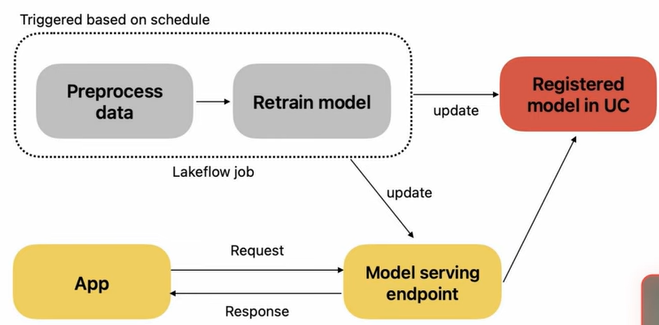

- Model serving with feature lookup

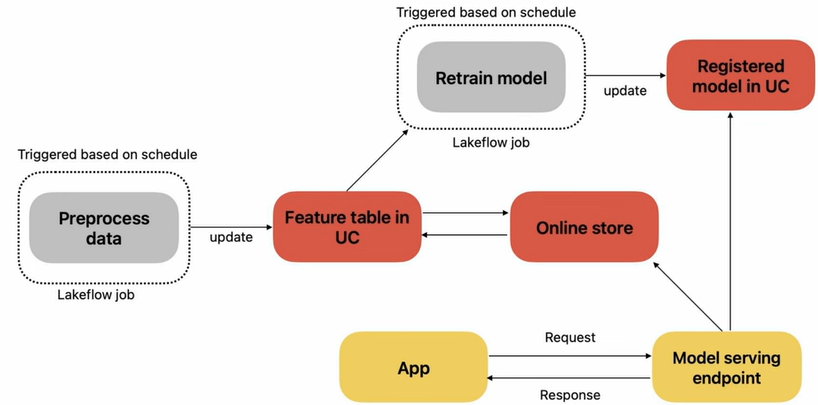

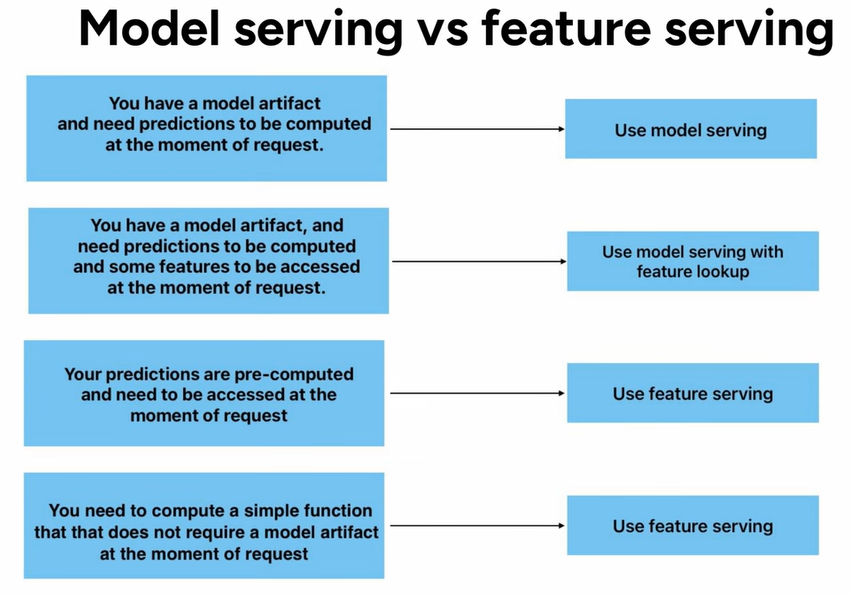

#### Lecture 6: Deploying Model Serving Endpoint
- Lecture 4 recap
  - MLflow model training & model registry.
  - We registered 2 type of models to cover different use cases
    - An sklearn pipeline
    - Custom model
  - We haven’t used these registered model for prediction yet. This lecture we will learn how to serve models by creating serving endpoint.
- This lecture include
  - Deploying an endpoints.
  - How to call the endpoints.
  - Traffic split vs A/B testing
##### Databricks Serverless Endpoints for ML Models
- A fully managed, serverless solution for deploying MLflow models as RESTful APIs in Databricks—no infrastructure setup or management required.
- Key Features:
  - nEasy deployment of registered MLflow models.
  - Automatic scaling, including optional scale-to-zero.
  - Built-in monitoring via Databricks UI (latency, throughput, error rates).
  - Supports batch and real-time inference.
- Why use it?
  - Simplifies deployment from experimentation to production.
  - Ideal for teams that want to focus on ML, not infrastructure.
  - Works out-of-the-box with the Databricks MLflow Model Registry.
- Documentation link: https://learn.microsoft.com/en-us/azure/databricks/machine-learning/model-serving/model-serving-limits
- Limitation:
  - Databricks serving is serverless: No ability to choose runtime and No control over cluster size (4GB RAM limit).
  - Can choose the workload size: Small:
    - 4 units, Medium: 8–16 units, Large: 16–64 units.
    - On request, XL, 2XL, and 3XL (512 units) sizes are available.
    - If scale-to-zero is enabled, the lower bound for each workload size is 0.
##### Compute Units, QPS and Performance Limit
- Each unit can process one request at a time.
- Autoscaling is based on the number of required units (even if a single unit is not optimally utilized, for example, only using 5% CPU).
- Number of required units = (queries per second) × (model processing time)
- MLFlow serve is used behind the Databricks serving and Payload structure is predefined.
  - https://mlflow.org/docs/latest/deployment/deploy-model-locally.html
  - https://docs.databricks.com/en/machine-learning/model-serving/score-custom-model-endpoints.html
- Refer lecture 6 code
- A/B Testing
  - Traffic split is not AB testing.
  - In case of AB testing, the same version of the model must be served to a customer during the whole experiment.
  - Traffic split can not guarantee that.
  - Simple split based on the hash function works better!

#### Lecture 7: Databricks Asset Bundles
- There are multiple ways to deploy a Databricks job with all its dependencies:
  - Terraform
  - Databricks APIs
  - Databricks asset bundles (DAB)
- Asset bundles is the recommended approach (uses Terraform on the background).
- Databricks Asset Bundles (DAB)
  - Declarative configuration for Databricks resources (jobs, notebooks, models).
  - Code + config in one place: enables reproducibility and CI/CD.
  - Defined using YAML files, deployed via CLI or CI pipelines.
  - Supports multiple environments (dev, staging, prod).
- Databricks Workflows
  - Workflow engine for building and scheduling jobs.
  - Supports notebooks, Python scripts, JARs, SQL tasks, and dbt.
  - Enables task dependencies, retries, alerts, and parameter passing.
  - Integrates with DABs for production-grade pipelines.
- Example Flow

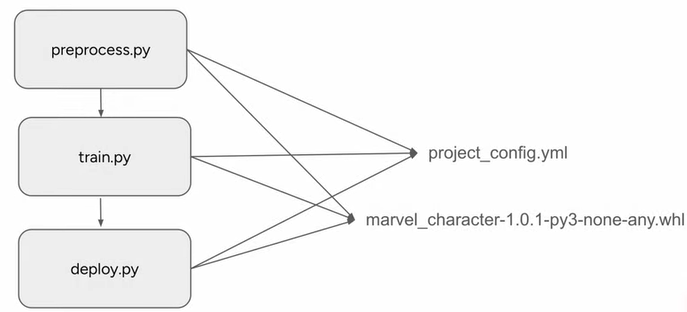

- For more details: https://docs.databricks.com/en/dev-tools/bundles/settings.html
- MLOps pipeline: Orange params are inputs to the tasks, Blue params are outputs from task.

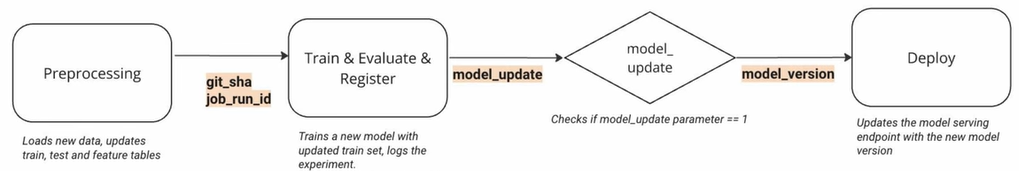

- Trains a new model with updated train set, logs the experiment. Compares the current model used in serving endpoint with the new model trained, if new model performs better then register the model as new version and pass model_update = 1 flag. Outputs: model_update and model_version.
- Example flow: Preproces (Lecture 2) -> Train and Register (Lecture 4) -> Deploy (Lecture 6)
- Refer databricks.yml and model_deployment.yml file to understand the flow and how processes are triggered. After that refer script folder.

#### Lecture 8: CI/CD and Deployment Strategies
- ML team has 3 work space (Dev, Test, Prod) and 3 catalog (dev catalog, test catalog, prod catalog).
- Access & Deployment Model
  - All workspaces have read access to data in the production catalog.
  - Corresponding workspaces can read from and write to schemas in corresponding catalogs (dev -> dev, acc -> acc, prd -> prd).
  - Users only have direct access to the development workspace.
  - Deployment in acc/prd can only be done via CD pipelines via service principals / managed identities.
- Refer .github/workflow for more details

#### Lecture 9: Intro to Monitoring
- Generic monitoring (software engineering):
  - System health
  - Errors
  - Latency
- ML-specific monitoring:
  - Data quality checks
  - Data drift – questionable
  - Model drift
- Costs & business value:
  - Infrastructure costs
  - Business value
  - KPIs
- Fairness & bias (requirement for some ML systems like fraud detection, loans approval).
- If Code, Data Model, Environment, Infrastructure are same still system can produce different result due to statistical property of data have changed.
- Data Drift:
  - Data drift occurs when the distribution of the input data changes over time.
  - Example (housing prices): There are a lot of new houses entering the market in the district. Preferences of people buying houses did not change, relationship between the inputs and the price did not change.
  - This data drift may have resulted in the overall drop in model performance, just because the model in general does not predict prices well for new houses, and that group became larger.
  - Data drift may be a symptom of model drift.
- Model Drift:
  - Concept drift (or model drift) occurs when the relationship between the input variables and the output changes.
  - Example (housing prices): There are new houses entering the market in the district, and there is government's subsidy available for families with children. Bigger houses are sold for lower prices.
  - Relationship between the inputs and the price changed.
  - https://www.nannyml.com/blog/when-data-drift-does-not-affect-performance-machine-learning-models
  - Lakehouse monitoring: https://learn.microsoft.com/en-us/azure/databricks/lakehouse-monitoring/monitor-output
- From table to lakehouse monitoring
  - Inference table cannot be used for monitoring directly.
  - A table with inference profile should contain columns: timestamp, model inputs, model prediction, ground-truth label
- General setup:

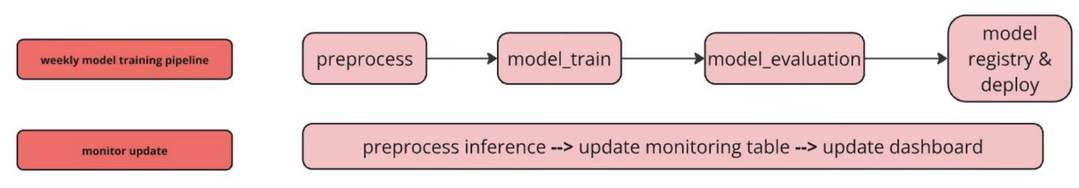

#### Lecture 10: Implementing model monitoring in Databricks
- Refer monitoring.py file under src/marvel_characters and lecture10 from notebooks.